# Plots

In [1]:
import matplotlib.pyplot as plt

In [2]:
mistral_whole = {
    "total": 0.5206751054852321,
    "extrinsic-NP": 0.9082969432314411,
    "extrinsic-predicate": 0.0,
    "intrinsic-NP": 0.0,
    "intrinsic-predicate": 0.0,
    "correct": 0.7584905660377359
}

mistral_under = {
    "total": 0.3025,
    "extrinsic-NP": 0.35365853658536583,
    "extrinsic-predicate": 0.0625,
    "intrinsic-NP": 0.023529411764705882,
    "intrinsic-predicate": 0.45121951219512196,
    "correct": 0.676056338028169
}

mistral_over = {
    "total": 0.572961373390558,
    "extrinsic-NP": 0.3419354838709677,
    "extrinsic-predicate": 0.5783898305084746,
    "intrinsic-NP": 0.4457831325301205,
    "intrinsic-predicate": 0.6781115879828327,
    "correct": 0.8508158508158508
}

llama_whole = {
    "total": 0.5721518987341773,
    "extrinsic-NP": 0.9125799573560768,
    "extrinsic-predicate": 0.1407035175879397,
    "intrinsic-NP": 0.023255813953488372,
    "intrinsic-predicate": 0.0,
    "correct": 0.8226415094339623
}

llama_under = {
    "total": 0.3225,
    "extrinsic-NP": 0.47435897435897434,
    "extrinsic-predicate": 0.13793103448275862,
    "intrinsic-NP": 0.13953488372093023,
    "intrinsic-predicate": 0.18518518518518517,
    "correct": 0.7794117647058824
}

gemma_under = {
    "total": 0.31329113924050633,
    "extrinsic-NP": 0.4625,
    "extrinsic-predicate": 0.10975609756097561,
    "intrinsic-NP": 0.19117647058823528,
    "intrinsic-predicate": 0.20512820512820512,
    "correct": 0.6808510638297872
}

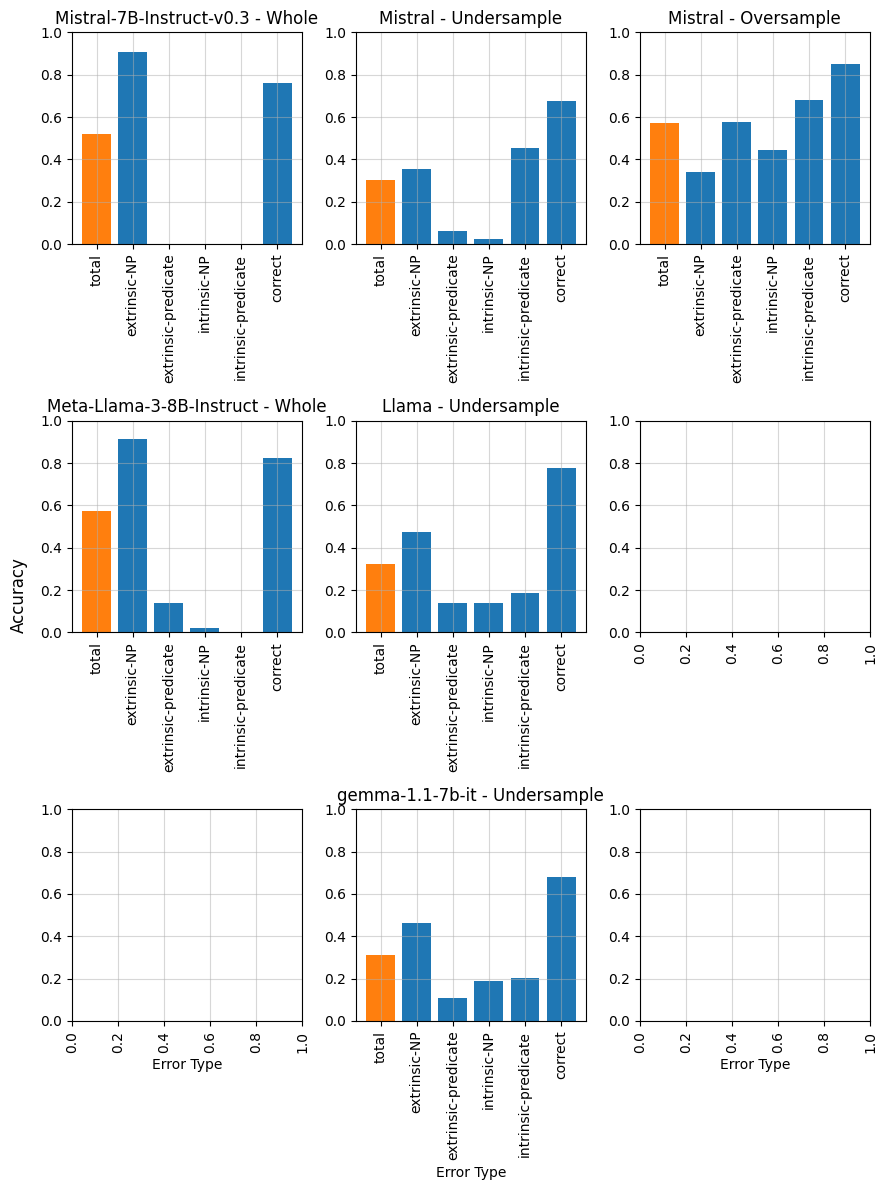

In [4]:
# List of data dictionaries
datasets = [mistral_whole, mistral_under, mistral_over, llama_whole, llama_under, gemma_under]
labels = ["Mistral-7B-Instruct-v0.3 - Whole", "Mistral - Undersample", "Mistral - Oversample", "Meta-Llama-3-8B-Instruct - Whole", "Llama - Undersample", "gemma-1.1-7b-it - Undersample"]

# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 3, figsize=(9, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop through datasets and axes
help = [0,1, 2, 3, 4, None, None, 5]
for i, ax in enumerate(axs):  #(data, ax) in enumerate(zip(datasets,
    if i in [0, 1, 2, 3, 4, 7]:
        keys = list(datasets[help[i]].keys())
        values = list(datasets[help[i]].values())
        # Assign colors: Red for 'total', blue for others
        colors = ['C1' if key == 'total' else 'C0' for key in keys]

        ax.bar(keys, values, color=colors)
        ax.set_title(f'{labels[help[i]]}')

    if i in [6, 7, 8]:
        ax.set_xlabel('Error Type')
    
    ax.set_ylim(0, 1)  # Assuming values are in the range 0 to 1
    ax.grid('--', alpha=0.5)
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

fig.supylabel('Accuracy')
#fig.suptitle('Error Analysis')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()